# TRANSFORMADA DE FOURIER NAS IMAGENS

## O que é a transformada de Fourier?

A **Transformada de Fourier** (TF) é uma técnica matemática que converte um sinal do **domínio do espaço** (tempo ou imagem) para o **domínio da frequência**.  

Em imagens, isso significa que podemos analisar a frequência dos pixels, separando componentes de **baixa** e **alta** frequência.  

### 🔸 Exemplo de Frequências em Imagens  
- **Baixa frequência**: Regiões suaves, sem mudanças bruscas de cor (ex.: fundo desfocado).  
- **Alta frequência**: Bordas, texturas e detalhes finos.  

---

### Transformada de Fourier Discreta (DFT)  
A Transformada de Fourier Discreta (DFT) de uma imagem 2D \( f(x, y) \) é definida por:  

$$
F(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) e^{-j2\pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$
 
A Transformada Inversa de Fourier (IDFT) é usada para reconstruir a imagem original a partir do domínio da frequência:  
 
$$
f(x, y) = \frac{1}{MN} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u, v) e^{j2\pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

> Na prática, usamos a **FFT (Fast Fourier Transform)** para acelerar os cálculos.

## Aplicações da Transformada de Fourier em Imagens

- **Filtragem no Domínio da Frequência:** Remoção de ruídos periódicos
- **Compressão de Imagens:** Algoritmos como JPEG usam TF para compressão  
- **Análise de Texturas:** Identificação de padrões repetitivos
- **Visão Computacional:** Realce de bordas e detecção de estruturas

## Espectro da Imagem em Tempo Real

- Chanfro:
https://agostinhobritojr.github.io/apps/editablespectrum/

## Code: 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_frequency_domain(image):
    frequency_image = np.fft.fftshift(np.fft.fft2(image))
    
    magnitude_spectrum = np.log(np.abs(frequency_image) + 1)

    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Imagem no dominio espacial')

    plt.subplot(122),  plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Espectro de magnitude')

    plt.show()


In [3]:
lena = cv2.imread('../images/lena.png', 0)

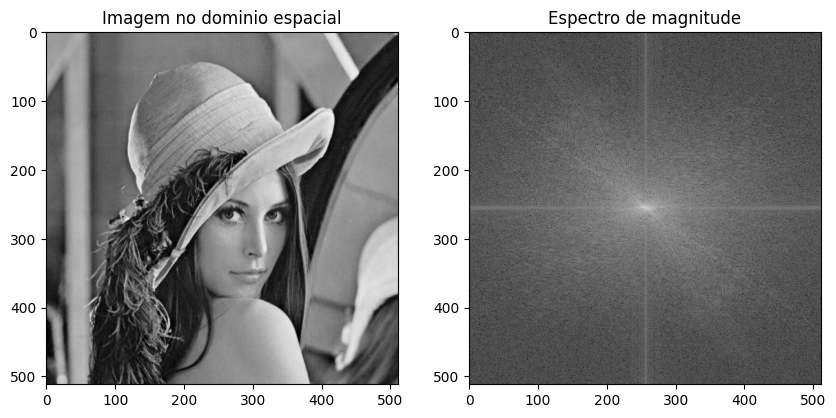

In [4]:
plot_frequency_domain(lena)

In [7]:
from skimage import draw

In [18]:
def filter_frequency_domain(image, low_pass=True):
    frenquecy_image = np.fft.fftshift(np.fft.fft2(image))

    rows, cols = image.shape
    crow, ccol = rows//2, cols//2

    rr, cc = draw.disk((crow, ccol), 50, shape=(rows, cols))

    if low_pass:
        mask = np.zeros((rows, cols), np.uint8)
        mask[rr, cc] = 1
    else:
        mask = np.ones((rows, cols), np.uint8)
        mask[rr, cc] = 0

    filtered_frequency = frenquecy_image * mask 


    f_ishift = np.fft.ifftshift(filtered_frequency)
    img_back = np.fft.ifft2(f_ishift)

    img_back = np.abs(img_back)

    return img_back


    



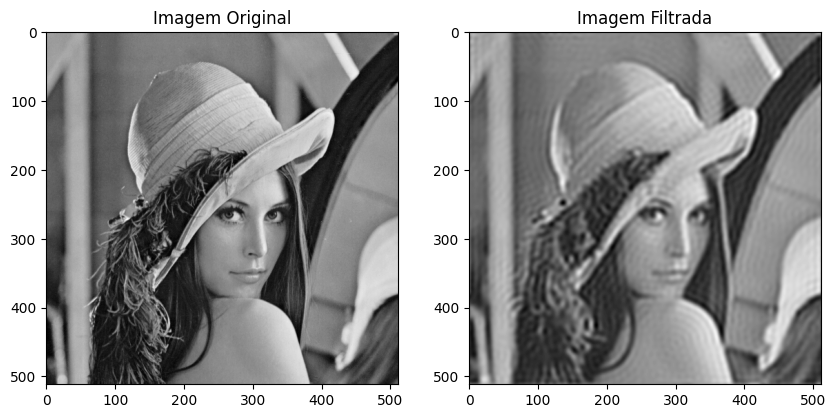

In [19]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(lena, cmap='gray')
plt.title('Imagem Original')

plt.subplot(122), plt.imshow(filter_frequency_domain(lena, low_pass=True), cmap='gray')
plt.title('Imagem Filtrada')

plt.show()


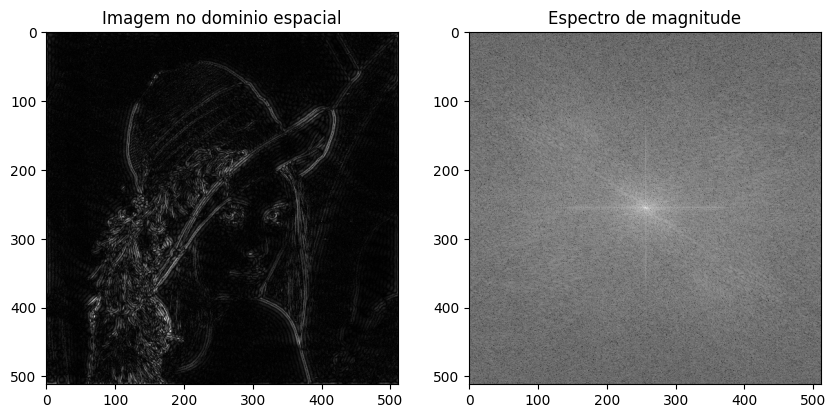

In [23]:
plot_frequency_domain(filter_frequency_domain(lena, low_pass=False))